# 📰 Effortless Press Articles: Scrape, Rewrite & Format with BBC, ChatGPT & Jinja

## 1) Get information from  BBC source (using scraper techniques)

This same technique is valid for any source as long as we adapt the logic a little bit.

In [ ]:
import pandas as pd
import pytz
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
from urllib.parse import urlparse


First, we take the data from a RSS feed since it has an easily accessible xml format.

In [ ]:
#  Define a function to parse the RSS feed items and return them as a list of dictionaries.

def get_source_name(url):
    domain = urlparse(url).netloc
    source = domain.replace('www.', '').split('.')[0]
    return source

def parser_items_rss(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    items = soup.find_all('item')
    source = get_source_name(url)

    lista_items = []
    for item in items:
        row = {
            "title": item.find('title').text if item.find('title') else None,
            "description": item.find('description').text if item.find('description') else None,
            "link": item.find('link').text if item.find('link') else None,
            "pubDate": item.find('pubDate').text if item.find('pubDate') else None,
            "source": source
        }
        lista_items.append(row)

    return lista_items

# Feed rss
urls = [
    "http://feeds.bbci.co.uk/news/technology/rss.xml"
]

# empty list
datos = []

# Iterates over each URL and accumulates the data
for url in urls:
    datos.extend(parser_items_rss(url))

# Creates the DataFrame from the list of data
df = pd.DataFrame(datos)
print (df)


# Convertimos 'pubDate' a fecha y hora con zona horaria UTC
df['pubDate'] = pd.to_datetime(df['pubDate'], format='%a, %d %b %Y %H:%M:%S %Z')

# Order by date
df_sorted = df.sort_values(by='pubDate', ascending=False)

# Filter by last 5 days
seven_days_ago = datetime.now(pytz.utc) - timedelta(days=7)
df_filtered = df_sorted[df_sorted['pubDate'] > seven_days_ago]

df_filtered = df_filtered.drop(columns=['pubDate', 'source'])




                                                title  \
0   Can we really 'reset the internet' to make it ...   
1   Tech firms told to hide 'toxic' content from c...   
2     E-gates back online after delays at UK airports   
3   FTX says it has billions more than owed to vic...   
4   US revokes licences for sales of chips to Huawei    
..                                                ...   
59        Could AI take the grind out of accountancy?   
60  India in undersea race to mine world’s battery...   
61      'Journalists are feeding the AI hype machine'   
62  Once India's most valuable start-up, Byju's is...   
63  'I'd heard the big, bad, scary conversation ab...   

                                          description  \
0   Ofcom has taken a major step in setting out pl...   
1   Social media firms like Instagram and TikTok w...   
2   Long queues built up at airports affected by a...   
3   The failed cryptocurrency giant says it has bi...   
4   The move follows Huawei's 

In [ ]:
df_filtered

,title,description,link
0,Can we really 'reset the internet' to make it ...,Ofcom has taken a major step in setting out pl...,https://www.bbc.com/news/articles/cxe94vpx111o
1,Tech firms told to hide 'toxic' content from c...,Social media firms like Instagram and TikTok w...,https://www.bbc.com/news/articles/czrx13jj9p3o
2,E-gates back online after delays at UK airports,Long queues built up at airports affected by a...,https://www.bbc.co.uk/news/business-68972065
4,US revokes licences for sales of chips to Huawei,The move follows Huawei's release of an AI-ena...,https://www.bbc.com/news/articles/cgxwpql2e82o
3,FTX says it has billions more than owed to vic...,The failed cryptocurrency giant says it has bi...,https://www.bbc.com/news/articles/c9wz3wkrdj9o
6,TikTok sues to block US law that could ban app,"TikTok said the measure was an ""extraordinary ...",https://www.bbc.com/news/articles/c72pqlgqe4jo
32,Tech Life: The mammoth ivory problem,Tech can play a role in combating the illegal ...,https://www.bbc.co.uk/sounds/play/w3ct5wm2
33,BBC Verify looks at fake AI-generated Met Gala...,Fake pictures of Katy Perry and other artists ...,https://www.bbc.co.uk/news/world-68973448
5,Microsoft axes four game studios including Hi-...,The Bafta award-winning game's developer is be...,https://www.bbc.com/news/articles/c72p5epzj2no
7,UK startup gets $1bn funding for self-driving ...,The funding being given to Wayve represents th...,https://www.bbc.com/news/articles/crgypzg4edvo


In [ ]:
# Convert DataFrame to JSON
json_result1 = df_filtered.to_json(orient="records", lines=True)

print(json_result1)

{"title":"Can we really 'reset the internet' to make it safer for children?","description":"Ofcom has taken a major step in setting out plans to protect children online, but hurdles remain.","link":"https:\/\/www.bbc.com\/news\/articles\/cxe94vpx111o"}
{"title":"Tech firms told to hide 'toxic' content from children","description":"Social media firms like Instagram and TikTok will have to make changes to comply with new online safety laws.","link":"https:\/\/www.bbc.com\/news\/articles\/czrx13jj9p3o"}
{"title":"E-gates back online after delays at UK airports","description":"Long queues built up at airports affected by a Border Force \"technical issue\" at passport control.","link":"https:\/\/www.bbc.co.uk\/news\/business-68972065"}
{"title":"US revokes licences for sales of chips to Huawei ","description":"The move follows Huawei's release of an AI-enabled computer powered by a chip created by Intel.","link":"https:\/\/www.bbc.com\/news\/articles\/cgxwpql2e82o"}
{"title":"FTX says it ha

## 2) OpenAI integration

In [ ]:
!pip install openai
#!pip install pytz
from openai import OpenAI
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.2 MB/s eta 0:00:00


In [ ]:
client = OpenAI(api_key="YOUR_API_KEY")

In [ ]:
import json

Here is an example output for chatgpt to understand exactly what is needed

In [ ]:
jsonExample={
  "title": "Acclaimed Photographer Cracks Instagram in His 80s",
  "author": "Nicola Bryan",
  "affiliation": "BBC News",
  "topic": "photography",
  "content": {
    "summary": "David Hurn, a renowned photographer with a career spanning almost seven decades, has gained a new following on social media. Living in Tintern, South Wales, the 89-year-old has documented significant events from the Aberfan disaster to the Beatles at the height of Beatlemania. After establishing Newport’s prestigious School of Documentary Photography in the '70s, Hurn has recently ventured into Instagram, amassing over 54,000 followers and compiling his posts into a photo book.",
    "why_importance": "Hurn’s adaptation to modern technology platforms like Instagram at the age of 89 underscores the timeless relevance of classic art forms in the digital age. His engagement on social media not only bridges generational gaps but also revitalizes interest in historical and documentary photography. It highlights how traditional artists can leverage new media to preserve and extend their legacy, engaging with a global audience and inspiring upcoming generations.",
    "next_steps": "David Hurn plans to continue exploring the intersection of classic photography and modern digital platforms. He is currently working on two new books and has opened his home to photography students for practical sessions, offering personal mentorship in exchange for assistance with maintaining his property. This initiative not only furthers his impact on the field of photography but also directly engages the next generation of photographers in hands-on learning and discussion."
  }
}


System indications for the first prompt we will ask for

In [ ]:
systemPrompt1 = ('''Provide output in valid JSON. The data schema should be like this:\n:
                        1. title
                        2. link
                        3. topic''')

System indications for the second prompt we will ask for

In [ ]:
systemPrompt2 = ("Provide output in valid JSON. The data schema should be like this:\n"
                       + json.dumps(jsonExample, indent=4)
                       + '''\nI mean the following structure keys and subkeys\n:
                        1. title
                        2. author
                        3. affiliation
                        4. topic
                        5. content
                            content.summary
                            content.why_importance
                            content.next_steps''')


In this function, the most relevant thing is that we indicate the expected format and we ask for the "finish_reason" that allows us to know how the request has gone, that is, if it has been completed successfully.

In [ ]:
def get_completion(user_prompt, system_prompt, model="gpt-3.5-turbo-1106"):
    """
    Generates a response from the OpenAI model based on the user and system prompts.
    Args:
    - client: The OpenAI client object.
    - user_prompt: String, the prompt from the user.
    - system_prompt: String, the prompt from the system.
    - model: String, the model ID to use for generating the response.

    Returns:
    - content: String, the content of the completion message.
    - finish_reason: String, the reason the chat completion finished.
    """
    chat_completion = client.chat.completions.create(
        model=model,
        response_format={"type": "json_object"},
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]
    )
    content = chat_completion.choices[0].message.content
    finish_reason = chat_completion.choices[0].finish_reason
    return content, finish_reason

### Prompt1: We enrich each news item with its corresponding topic

In [ ]:
user_prompt1 = f'''Enrich the JSON with the field topic based on the description JSON field \{json_result1}\. '''

In [ ]:
content,finish_reason= get_completion(user_prompt1,systemPrompt1)

In [ ]:
if finish_reason != "stop":
  print('ChatGPT has not stopped successfully')

The response has been successful


In [ ]:
finish_reason

'stop'

In [ ]:
data = json.loads(content)
data

{'articles': [{'title': "Can we really 'reset the internet' to make it safer for children?",
   'link': 'https://www.bbc.com/news/articles/cxe94vpx111o',
   'topic': 'Online Safety for Children'},
  {'title': "Tech firms told to hide 'toxic' content from children",
   'link': 'https://www.bbc.com/news/articles/czrx13jj9p3o',
   'topic': 'Online Safety for Children'},
  {'title': 'E-gates back online after delays at UK airports',
   'link': 'https://www.bbc.co.uk/news/business-68972065',
   'topic': 'Airport Technology'},
  {'title': 'US revokes licences for sales of chips to Huawei',
   'link': 'https://www.bbc.com/news/articles/cgxwpql2e82o',
   'topic': 'Technology Business'},
  {'title': 'FTX says it has billions more than owed to victims',
   'link': 'https://www.bbc.com/news/articles/c9wz3wkrdj9o',
   'topic': 'Cryptocurrency'},
  {'title': 'TikTok sues to block US law that could ban app',
   'link': 'https://www.bbc.com/news/articles/c72pqlgqe4jo',
   'topic': 'Legal Action & Soc

Now, the new about the one we want is chosen

In [ ]:
table=pd.DataFrame(data['articles'])

In [ ]:
table

,title,link,topic
0,Can we really 'reset the internet' to make it ...,https://www.bbc.com/news/articles/cxe94vpx111o,Online Safety for Children
1,Tech firms told to hide 'toxic' content from c...,https://www.bbc.com/news/articles/czrx13jj9p3o,Online Safety for Children
2,E-gates back online after delays at UK airports,https://www.bbc.co.uk/news/business-68972065,Airport Technology
3,US revokes licences for sales of chips to Huawei,https://www.bbc.com/news/articles/cgxwpql2e82o,Technology Business
4,FTX says it has billions more than owed to vic...,https://www.bbc.com/news/articles/c9wz3wkrdj9o,Cryptocurrency
5,TikTok sues to block US law that could ban app,https://www.bbc.com/news/articles/c72pqlgqe4jo,Legal Action & Social Media
6,Tech Life: The mammoth ivory problem,https://www.bbc.co.uk/sounds/play/w3ct5wm2,Technology & Conservation
7,BBC Verify looks at fake AI-generated Met Gala...,https://www.bbc.co.uk/news/world-68973448,AI & Fake Images
8,Microsoft axes four game studios including Hi-...,https://www.bbc.com/news/articles/c72p5epzj2no,Gaming Industry
9,UK startup gets $1bn funding for self-driving ...,https://www.bbc.com/news/articles/crgypzg4edvo,AI & Automotive Industry


For this tutorial, the 8 (9th) new is selected

In [ ]:
selectedNew = data['articles'][8]['link']

In [ ]:
selectedNewTopic=data['articles'][8]['topic']

In [ ]:
Topic='The topic is ' + selectedNewTopic

In [ ]:
selectedNew

'https://www.bbc.com/news/articles/c72p5epzj2no'

In [ ]:
response = requests.get(selectedNew)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the script that contains the JSON data
script = soup.find('script', {'id': '__NEXT_DATA__'})

# Loads the contents of the script as a JSON dictionary
dataNews = json.loads(script.string)

The author's name is extracted

In [ ]:
contributor_value = dataNews['props']['pageProps']['metadata']['contributor']
print("The author is ", contributor_value)
author="The author is "+ contributor_value

The author is  Tom Gerken


Analyze JSON structure

In [ ]:
def print_keys(data, prefix=''):
    for key in data.keys():
        print(prefix + key)
        if isinstance(data[key], dict):
            print_keys(data[key], prefix + key + '.')


print_keys(dataNews)


props
props.pageProps
props.pageProps.page
props.pageProps.page.@"news","articles","c72p5epzj2no",
props.pageProps.page.@"news","articles","c72p5epzj2no",.id
props.pageProps.page.@"news","articles","c72p5epzj2no",.contents
props.pageProps.page.@"news","articles","c72p5epzj2no",.topics
props.pageProps.page.@"news","articles","c72p5epzj2no",.onwardJourney
props.pageProps.page.@"news","articles","c72p5epzj2no",.relatedUrls
props.pageProps.page.@"news","articles","c72p5epzj2no",.collections
props.pageProps.page.@"news","articles","c72p5epzj2no",.section
props.pageProps.page.@"news","articles","c72p5epzj2no",.pillar
props.pageProps.page.@"news","articles","c72p5epzj2no",.collection
props.pageProps.page.@"news","articles","c72p5epzj2no",.destination
props.pageProps.country
props.pageProps.isUkHeader
props.pageProps.featureFlags
props.pageProps.featureFlags.authentication
props.pageProps.featureFlags.bookmarking
props.pageProps.featureFlags.client-side-routing
props.pageProps.featureFlags.cli

In [ ]:
slug_id=dataNews['query']['slug'][2]

In [ ]:
# Extract the specific news
news_content = dataNews['props']['pageProps']['page'][f'@"news","articles","{dataNews["query"]["slug"][2]}",']['contents']


# Extract the headline in a safe way
headline = None
for block in news_content:
    if block['type'] == 'headline':
        try:
            headline = block['model']['blocks'][0]['model']['blocks'][0]['model']['text']
        except KeyError:
            continue  # Si no se encuentra la estructura esperada, simplemente continua

# Extract all the text content securely
news_text = []
for block in news_content:
    if block['type'] == 'text':
        for text_block in block['model']['blocks']:
            try:
                paragraph = text_block['model']['text']
                news_text.append(paragraph)
            except KeyError:
                continue


BBCnews =str(author + "\n" + Topic + "\n")

print("Headline:", headline)
print("Content:")
for paragraph in news_text:
    BBCnews += paragraph + "\n"

news_text_string = BBCnews.strip()
print(BBCnews)

Headline: Microsoft axes four game studios including Hi-Fi Rush developer
Content:
The author is Tom Gerken
The topic is Gaming Industry
Microsoft is shutting four studios, including Tango Gameworks, the developers of Bafta award-winning Hi-Fi Rush.
The Tokyo studio is being closed alongside Texas-based Arkane Austin and Canadian developer Alpha Dog Studios.
Wisconsin-based Roundhouse Games will be absorbed into Elder Scrolls Online developer ZeniMax Online Studios.
Microsoft has not said how many jobs will be cut as a result of the closures, which are all being made at subsidiary Bethesda - which the tech giant bought for $7.5bn (then £5.85bn) in 2020.
"I just want to say that I love all the people at Arkane Austin so much," said studio head Harvey Smith in a post on X. 
"Great times, hard times, we went through so much, together."
Head of Xbox Games Studios Matt Booty announced the news in an email to staff, seen by the BBC.
He said the move meant it was ending development on Arkane 

### Prompt2: Generate an article in JSON format for seamless pasting into a Word template

In [ ]:
user_prompt2 = f"Take on the role of journalism expert. I send you a new between double quotation marks \"{BBCnews}\". Extract the most relevant information to generate to cvJSON format example"

In [ ]:
content,finish_reason= get_completion(user_prompt2,systemPrompt2)

In [ ]:
content

'{\n    "title": "Microsoft Shuts Four Studios Including Tango Gameworks in Gaming Industry Restructuring",\n    "author": "Tom Gerken",\n    "affiliation": "BBC News",\n    "topic": "gaming industry",\n    "content": {\n        "summary": "Microsoft is closing four studios, including Tango Gameworks known for developing the award-winning game Hi-Fi Rush. The closures will affect studios in Tokyo, Texas, Canada, and Wisconsin, with no specific details on job cuts. Head of Xbox Games Studios Matt Booty confirmed the closure and the end of development for Arkane Austin game Redfall. The company plans to provide compensation to players who pre-ordered content for the game. The move has been met with criticism from gamers and industry figures, particularly after the recent cuts at Bethesda, where Microsoft has around 22,000 people working in its gaming division.",\n        "why_importance": "The closures and staff cuts in Microsoft\'s gaming subsidiaries highlight ongoing challenges in the

In [ ]:
article_press= json.loads(content)
print(article_press)

{'title': 'Microsoft Shuts Four Studios Including Tango Gameworks in Gaming Industry Restructuring', 'author': 'Tom Gerken', 'affiliation': 'BBC News', 'topic': 'gaming industry', 'content': {'summary': 'Microsoft is closing four studios, including Tango Gameworks known for developing the award-winning game Hi-Fi Rush. The closures will affect studios in Tokyo, Texas, Canada, and Wisconsin, with no specific details on job cuts. Head of Xbox Games Studios Matt Booty confirmed the closure and the end of development for Arkane Austin game Redfall. The company plans to provide compensation to players who pre-ordered content for the game. The move has been met with criticism from gamers and industry figures, particularly after the recent cuts at Bethesda, where Microsoft has around 22,000 people working in its gaming division.', 'why_importance': "The closures and staff cuts in Microsoft's gaming subsidiaries highlight ongoing challenges in the gaming industry, with thousands of jobs lost a

##3) Generate the Word document from the template

Donwload the template. In this we can see the Jinja notations

In [ ]:
!pip install gdown


In [ ]:
# file ID of Google Drive
file_id = '1np54DP-9brZD9kYBSGnavXlFGpDw2pCb'

!gdown "https://drive.google.com/uc?id={file_id}" -O "template.docx"



Downloading...
From: https://drive.google.com/uc?id=1np54DP-9brZD9kYBSGnavXlFGpDw2pCb
To: /content/template.docx
100% 15.2k/15.2k [00:00<00:00, 28.2MB/s]


**Jinja Template Preview**

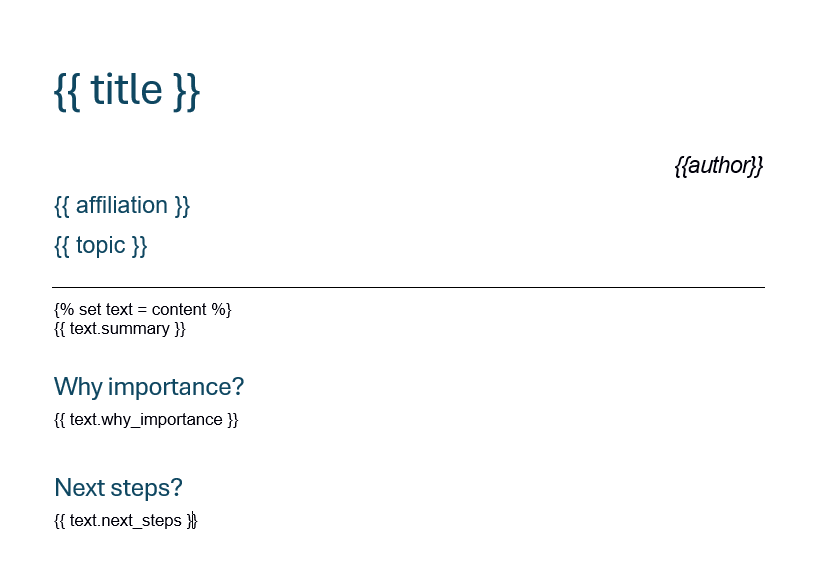

In [ ]:
pip install docxtpl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docxcompose: filename=docxcompose-1.4.0-py3-none-any.whl size=23267 sha256=a1d9fab8deb200656e0a198b24c848f714e66b6f7db004e58e980d42293e3fc6
  Stored in directory: /root/.cache/pip/wheels/28/0e/78/2dc28f2d5b192d1a3ec237ec60e9d65654a078dfe07ce3a714
Successfully built docxcompose


In [ ]:
from docxtpl import DocxTemplate

Copy the JSON generated by ChatGPT into the Word template.

In [ ]:
doc = DocxTemplate("template.docx")

doc.render(article_press)
doc.save("article_press.docx")

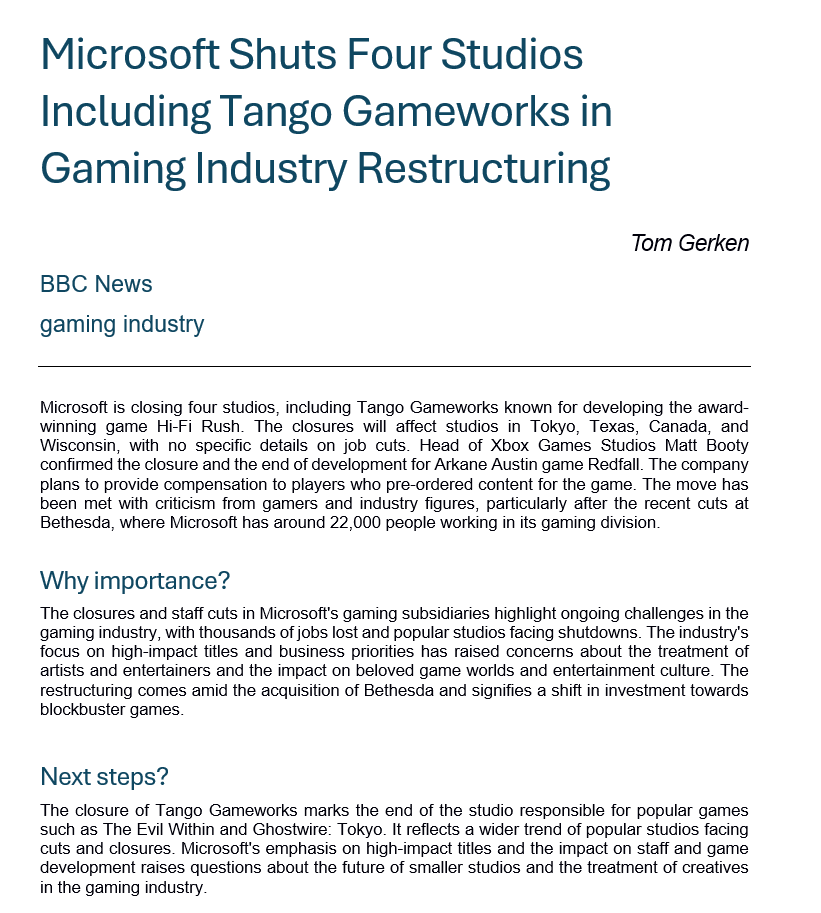

Thanks for making it to the end, and happy coding! 🎉💻